In [ ]:
from typing_extensions import dataclass_transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#load the data
data = pd.read_csv("/content/education_data_analysis_dataset.csv")
print(data.head())



     ID Category        Date  Student Count  Pass Percentage     Label
0  ID_1   Type A  2018-01-01            595           235.19   Neutral
1  ID_2   Type D  2018-01-02            953           215.16  Positive
2  ID_3   Type A  2018-01-03            110           287.91  Positive
3  ID_4   Type D  2018-01-04            366           219.01   Neutral
4  ID_5   Type C  2018-01-05            758            46.30  Negative


In [ ]:
# explore the data
# basic info
print(data.info())

# check missing values
print(data.isnull().sum())

# summary statistics
print(data.describe())

# unique values in categorical colums
print("Unique Categories:", data['Category']. unique())
print("Unique Labels:", data['Label'].unique())

# student avg
print("Student Avg", data['Student Count'].mean())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   object 
 1   Category         1000 non-null   object 
 2   Date             1000 non-null   object 
 3   Student Count    1000 non-null   int64  
 4   Pass Percentage  1000 non-null   float64
 5   Label            1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
ID                 0
Category           0
Date               0
Student Count      0
Pass Percentage    0
Label              0
dtype: int64
       Student Count  Pass Percentage
count    1000.000000      1000.000000
mean      509.135000       251.590290
std       289.017948       141.276577
min         4.000000        10.080000
25%       256.000000       128.477500
50%       512.000000       250.730000
75%       765.500000       368.415000
max       998.00

In [ ]:
# clean the data

# drop rows with missing values
data = data.dropna()

# convert date column to datetime formate
data['Date'] = pd.to_datetime(data['Date'])

# check for duplicate rows
data = data.drop_duplicates()

# validate data types
print(data.dtypes)


ID                         object
Category                   object
Date               datetime64[ns]
Student Count               int64
Pass Percentage           float64
Label                      object
dtype: object


In [ ]:
# total student by category
total_students_by_category = data.groupby('Category')['Student Count'].sum()
print(total_students_by_category)

# # average stay duration by category
average_stay_duration = data.groupby('Category')['Pass Percentage'].mean()
print(average_stay_duration)


# # Monthly Students Trends
data['Month']=data['Date'].dt.month
monthly_trends = data.groupby('Month')['Pass Percentage'].sum()
print(monthly_trends)


Category
Type A    128449
Type B    125227
Type C    130321
Type D    125138
Name: Student Count, dtype: int64
Category
Type A    260.421348
Type B    255.055106
Type C    245.371706
Type D    245.065732
Name: Pass Percentage, dtype: float64
Month
1     19147.77
2     22770.71
3     26997.80
4     23319.13
5     26177.35
6     23299.76
7     25909.46
8     20961.08
9     20198.63
10    14481.14
11    13950.66
12    14376.80
Name: Pass Percentage, dtype: float64


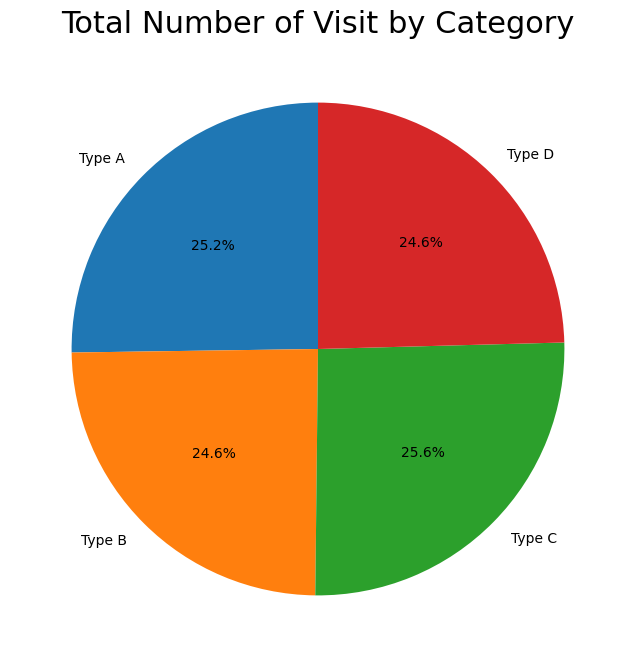

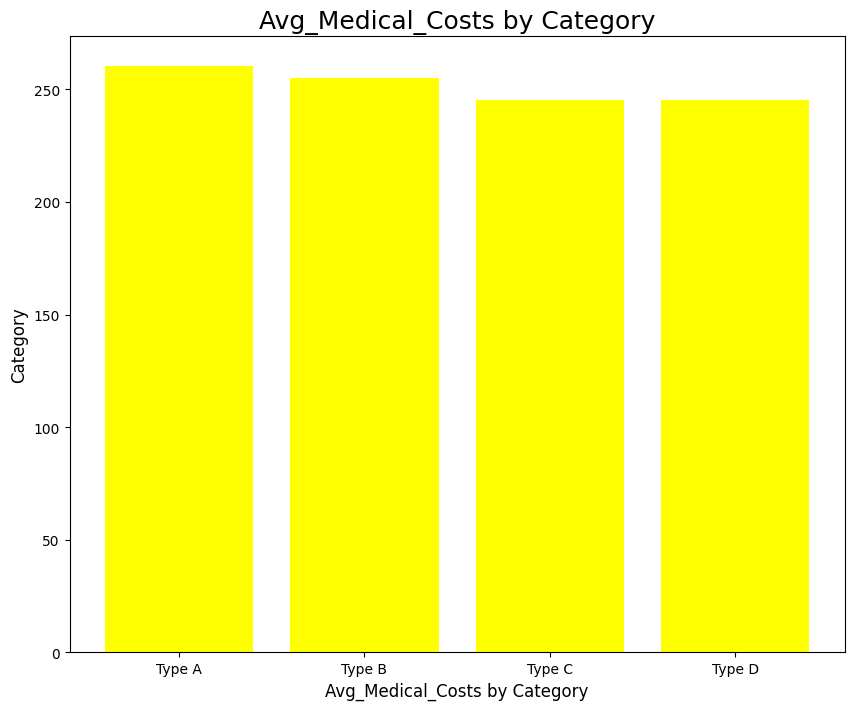

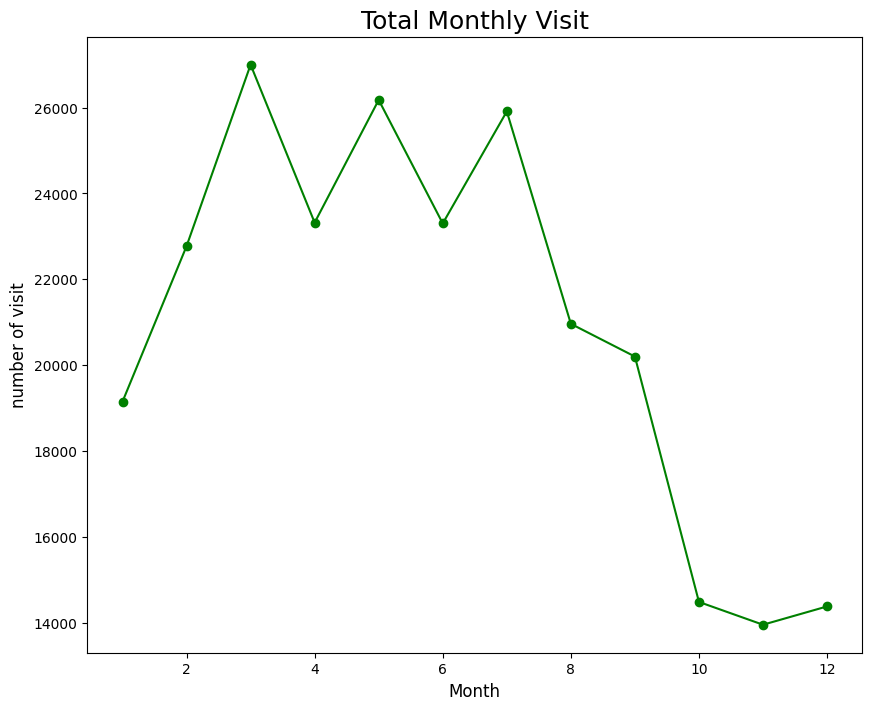

In [ ]:
# 1. Pie chart ---->
plt.figure(figsize=(10, 8))
plt.pie(total_students_by_category.values, labels=total_students_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title("Total Number of Visit by Category", fontsize=22)
plt.show()

# 2. bar chart ---->
plt.figure(figsize=(10, 8))
plt.bar(average_stay_duration.index, average_stay_duration.values, color='yellow')
plt.title("Avg_Medical_Costs by Category", fontsize=18)
plt.xlabel("Avg_Medical_Costs by Category", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

# 3. plot chart ------>
plt.figure(figsize=(10, 8))
plt.plot(monthly_trends.index, monthly_trends.values, marker='o', color='green')
plt.title("Total Monthly Visit", fontsize=18)
plt.xlabel("Month", fontsize=12)
plt.ylabel("number of visit", fontsize=12)
plt.show()
